In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
file=pd.read_csv("file.csv")
x_terminal=file['median_house_value']
y_terminal=file['median_income']
data_frame=pd.DataFrame({
    "Median House Value ":x_terminal,
    "median_income": y_terminal
})
print( data_frame )

       Median House Value   median_income
0                 452600.0         8.3252
1                 358500.0         8.3014
2                 352100.0         7.2574
3                 341300.0         5.6431
4                 342200.0         3.8462
...                    ...            ...
20635              78100.0         1.5603
20636              77100.0         2.5568
20637              92300.0         1.7000
20638              84700.0         1.8672
20639              89400.0         2.3886

[20640 rows x 2 columns]


In [5]:
x_train = x_terminal
y_train = y_terminal

# m is the number of training examples
m = len(x_train)
print(f"Number of training examples is: {m}")

# n is the number of testing examples
n=len(y_train)
print(f"Number of testing examples is: {n}")

Number of training examples is: 20640
Number of testing examples is: 20640


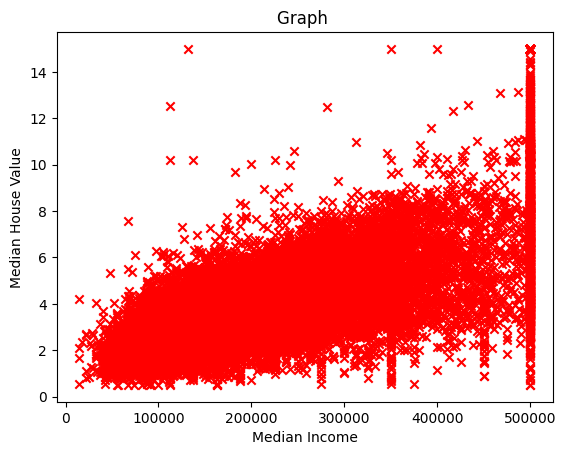

In [6]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Graph ")
# Set the y-axis label
plt.ylabel('Median House Value')
# Set the x-axis label
plt.xlabel('Median Income')
plt.show()

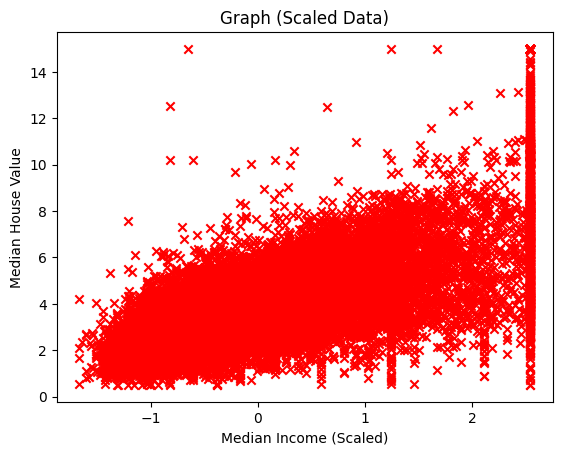

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming x_train and y_train are pandas Series

# Scaling the data (convert x_train to NumPy array first)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.values.reshape(-1, 1))  # Convert to NumPy array and reshape

# Plot the scaled data points
plt.scatter(x_train_scaled, y_train, marker='x', c='r')

# Set the title
plt.title("Graph (Scaled Data)")

# Set the y-axis label
plt.ylabel('Median House Value')

# Set the x-axis label
plt.xlabel('Median Income (Scaled)')

# Show the plot
plt.show()


In [13]:
w = 0.00002#it is moving it like it's tip part up and down
b = 0.1#it is moving the line in row form one row up and down
print(f"w: {w}")
print(f"b: {b}")
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples
      w,b (scalar)    : model parameters
    Returns
      y (ndarray (m,)): target values
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b

    return f_wb

w: 2e-05
b: 0.1


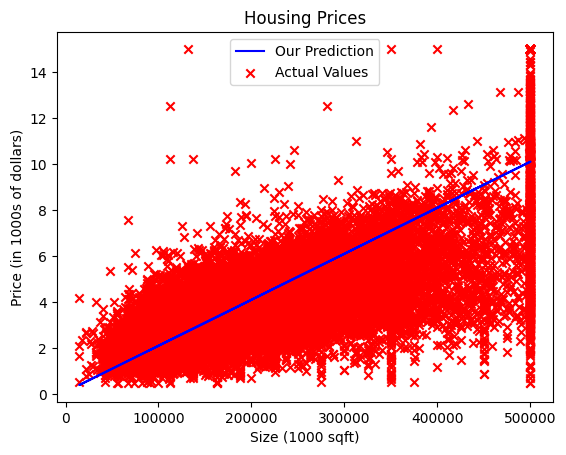

In [14]:
tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

In [54]:
print(file.columns)


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


Mean Squared Error: 1.8189894266014017
R-squared: 0.47923106483452105


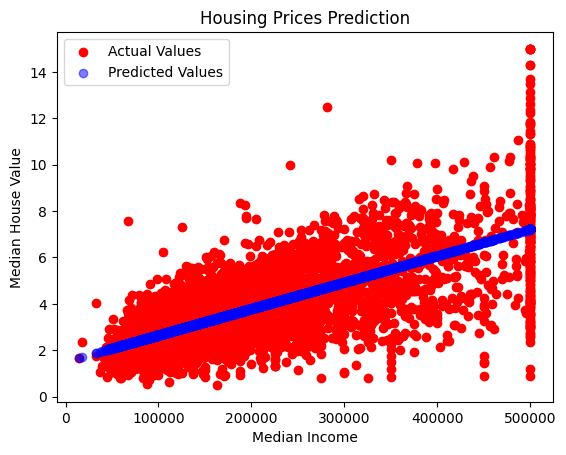

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
# Assuming 'data.csv' contains your data with 'Median Income' and 'Median House Value'
data = pd.read_csv('file.csv')

# Features and target variable
X = data[['median_house_value']].values  # Features (2D array)
y = data['median_income'].values 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot the results
plt.scatter(X_test, y_test, color='red', label='Actual Values')
plt.scatter(X_test, y_pred, color='blue', label='Predicted Values', alpha=0.5)
plt.title('Housing Prices Prediction')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend()
plt.show()
